In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate Protein IDs with Q-value and Score

In [3]:
#read the CSV file into a dataframe. 
df= pd.read_csv('pG_picked_protein_group_no_remap.csv')

#select the column you want to keep
columns_to_keep = ['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df)
new_df.to_csv('ProteinIDs_picked_protein_group_no_remapwithScore.csv', index= False)

                                             Protein IDs   Q-value      Score
0                                   sp|P35527|K1C9_HUMAN  0.000316  18.661526
1                                   sp|P35908|K22E_HUMAN  0.000316  17.132790
2            sp|P67809|YBOX1_HUMAN;sp|Q9Y2T7|YBOX2_HUMAN  0.000316  16.793147
3            sp|P09972|ALDOC_HUMAN;sp|P05062|ALDOB_HUMAN  0.000316  16.784376
4      sp|P14550|AK1A1_HUMAN;sp|Q96JD6-4|AKCL2_HUMAN;...  0.000316  15.734628
...                                                  ...       ...        ...
38912                           pI|c17riboseqorf81_HUMAN  0.808952   0.000000
38913                           sR|single_ribo1703_HUMAN  0.808952   0.000000
38914                            sp|Q8N682-2|DRAM1_HUMAN  0.808952   0.000000
38915                             REV__pI|c18riboseqorf7  0.808960   0.000000
38916                            sp|Q96HC4-5|PDLI5_HUMAN  0.808960   0.000000

[38917 rows x 3 columns]


In [4]:
df = pd.read_csv('ProteinIDs_picked_protein_group_no_remapwithScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame, the new columns, and the 'Score' column
new_df = pd.concat([df['Q-value'], split_col, df['Score']], axis=1)
# Print the new dataframe
print(new_df)
new_df.to_csv('SeparateProteinIDs_picked_protein_group_no_remapwithScore.csv')

        Q-value Protein Type        Protein Uniprot  \
0      0.000316           sp                 P35527   
1      0.000316           sp                 P35908   
2      0.000316           sp                 P67809   
3      0.000316           sp                 P09972   
4      0.000316           sp                 P14550   
...         ...          ...                    ...   
38912  0.808952           pI  c17riboseqorf81_HUMAN   
38913  0.808952           sR  single_ribo1703_HUMAN   
38914  0.808952           sp               Q8N682-2   
38915  0.808960      REV__pI         c18riboseqorf7   
38916  0.808960           sp               Q96HC4-5   

                                           Protein Label      Score  
0                                             K1C9_HUMAN  18.661526  
1                                             K22E_HUMAN  17.132790  
2                      YBOX1_HUMAN;sp|Q9Y2T7|YBOX2_HUMAN  16.793147  
3                      ALDOC_HUMAN;sp|P05062|ALDOB_HUMAN  1

In [5]:
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remapwithScore.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-PickedProteinGroupNoRemapwithScore.csv', index=False)

       Unnamed: 0   Q-value Protein Type Protein Uniprot  \
0               0  0.000316           sp          P35527   
1               1  0.000316           sp          P35908   
2               2  0.000316           sp          P67809   
3               3  0.000316           sp          P09972   
4               4  0.000316           sp          P14550   
...           ...       ...          ...             ...   
18758       38859  0.808069           sp          O95561   
18759       38865  0.808211           sp          P35498   
18760       38886  0.808430           sp          Q96T52   
18761       38906  0.808918           sp          Q9NPH3   
18762       38911  0.808952      REV__sp          Q9UKB3   

                                           Protein Label      Score  \
0                                             K1C9_HUMAN  18.661526   
1                                             K22E_HUMAN  17.132790   
2                      YBOX1_HUMAN;sp|Q9Y2T7|YBOX2_HUMAN  16.79314

In [28]:

# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remapwithScore.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot', how='outer', indicator=True)

# check which rows are not merged
not_merged = merged_csv.loc[merged_csv['_merge'] == 'left_only']
print("The following rows from csv1 were not merged: ")
print(not_merged)

# check if discarded rows from the merged dataframe
#discarded_rows = merged_csv.loc[merged_csv['_merge'] == 'right_only']
#print("The following rows from csv2 were discarded in the merge: ")
#print(discarded_rows)

#save not merged rows into a file. 
not_merged.to_csv('MissingUniPROTPickedProteinGroupNoRemapwithScore.csv', index= False)

The following rows from csv1 were not merged: 
       Unnamed: 0   Q-value Protein Type        Protein Uniprot  \
79           76.0  0.000316           sp               Q92918-2   
84           81.0  0.000316           sp               Q68E01-2   
148         142.0  0.000316           sp               P57737-3   
163         156.0  0.000316           sp               P28838-2   
250         241.0  0.000316           sp               P55327-2   
...           ...       ...          ...                    ...   
38912     38912.0  0.808952           pI  c17riboseqorf81_HUMAN   
38913     38913.0  0.808952           sR  single_ribo1703_HUMAN   
38914     38914.0  0.808952           sp               Q8N682-2   
38915     38915.0  0.808960      REV__pI         c18riboseqorf7   
38916     38916.0  0.808960           sp               Q96HC4-5   

                                           Protein Label      Score  \
79                       M4K1_HUMAN;sp|Q92918|M4K1_HUMAN  12.120102   
84    

In [29]:
# Read in the csv file
data = pd.read_csv("MissingUniPROTPickedProteinGroupNoRemapwithScore.csv")

# Fill any missing values in the "Protein Label" column with "MISSING"
data["Protein Label"].fillna("MISSING", inplace=True)

# Filter the rows where "HUMAN" is in the "Protein Label" column
human_data = data[data["Protein Label"].str.contains("HUMAN")]

# Print the resulting data
print(human_data)

       Unnamed: 0   Q-value Protein Type Protein Uniprot  \
0            76.0  0.000316           sp        Q92918-2   
1            81.0  0.000316           sp        Q68E01-2   
2           142.0  0.000316           sp        P57737-3   
3           156.0  0.000316           sp        P28838-2   
4           241.0  0.000316           sp        P55327-2   
...           ...       ...          ...             ...   
20144     38905.0  0.808918      REV__sp        Q9UBT2-2   
20147     38909.0  0.808952      REV__sp        Q6B8I1-5   
20148     38910.0  0.808952      REV__sp        Q8IWJ2-3   
20151     38914.0  0.808952           sp        Q8N682-2   
20153     38916.0  0.808960           sp        Q96HC4-5   

                                           Protein Label      Score  \
0                        M4K1_HUMAN;sp|Q92918|M4K1_HUMAN  12.120102   
1      INT3_HUMAN;sp|Q68E01|INT3_HUMAN;sp|Q68E01-3|IN...  12.057751   
2      CORO7_HUMAN;sp|P57737-2|CORO7_HUMAN;sp|P57737-...  11.34529

# Protein Label which are not human 

In [30]:
# Fill any missing values in the "Protein Label" column with "MISSING"
data["Protein Label"].fillna("MISSING", inplace=True)

# Filter the rows where "HUMAN" is NOT in the "Protein Label" column
not_human_data = data[~data["Protein Label"].str.contains("HUMAN")]

# Print the resulting data
print(not_human_data)
not_human_data.to_csv('MergedHumanProteome-PickedProteinGroupNoRemapwithScore(NOTHUMANDATA).csv', index=False)

       Unnamed: 0   Q-value Protein Type        Protein Uniprot Protein Label  \
11          384.0  0.000316           sp                 P00698    LYSC_CHICK   
19          596.0  0.000316           sp                 P00761      TRYP_PIG   
32          804.0  0.000316           sp                 P02769    ALBU_BOVIN   
34          826.0  0.000316           sp                 P02662   CASA1_BOVIN   
42          975.0  0.000316           sp                 P01012    OVAL_CHICK   
...           ...       ...          ...                    ...           ...   
20145     38907.0  0.808926      REV__pI        c15riboseqorf53       MISSING   
20146     38908.0  0.808926           sR  single_ribo3111_HUMAN       MISSING   
20149     38912.0  0.808952           pI  c17riboseqorf81_HUMAN       MISSING   
20150     38913.0  0.808952           sR  single_ribo1703_HUMAN       MISSING   
20152     38915.0  0.808960      REV__pI         c18riboseqorf7       MISSING   

           Score  Protein n

In [32]:
# Read in the csv file
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapwithScore(NOTHUMANDATA).csv")

# Filter the rows where "HUMAN" is in the "Protein Label" column
missing_data = data[data["Protein Label"].str.contains("MISSING")]

# Print the resulting data
print(missing_data)

       Unnamed: 0   Q-value Protein Type        Protein Uniprot Protein Label  \
20         5822.0  0.002021      REV__pI        c10riboseqorf99       MISSING   
21         6042.0  0.005542      REV__pI        c22riboseqorf46       MISSING   
22         6101.0  0.006801      REV__sR         single_ribo502       MISSING   
24         6170.0  0.008315           sR   single_ribo728_HUMAN       MISSING   
25         6264.0  0.010766           pI  c11riboseqorf78_HUMAN       MISSING   
...           ...       ...          ...                    ...           ...   
10792     38907.0  0.808926      REV__pI        c15riboseqorf53       MISSING   
10793     38908.0  0.808926           sR  single_ribo3111_HUMAN       MISSING   
10794     38912.0  0.808952           pI  c17riboseqorf81_HUMAN       MISSING   
10795     38913.0  0.808952           sR  single_ribo1703_HUMAN       MISSING   
10796     38915.0  0.808960      REV__pI         c18riboseqorf7       MISSING   

          Score  Protein na

In [33]:
# Fill any missing values in the "Protein Label" column with "MISSING"
data["Protein Label"].fillna("MISSING", inplace=True)

# Filter the rows where "HUMAN" is NOT in the "Protein Label" column
other_animal_data = data[~data["Protein Label"].str.contains("MISSING")]

# Print the resulting data
print(other_animal_data)

       Unnamed: 0   Q-value Protein Type           Protein Uniprot  \
0           384.0  0.000316           sp                    P00698   
1           596.0  0.000316           sp                    P00761   
2           804.0  0.000316           sp                    P02769   
3           826.0  0.000316           sp                    P02662   
4           975.0  0.000316           sp                    P01012   
...           ...       ...          ...                       ...   
9248      35703.0  0.773028      REV__sR   single_ribo1546;REV__sR   
9310      35834.0  0.774749      REV__pI   c15riboseqorf36;REV__sR   
9632      36509.0  0.782018      REV__sp                    P00791   
9879      37004.0  0.786787      REV__pI  c17riboseqorf177;REV__pI   
10240     37741.0  0.794820      REV__pI   c18riboseqorf28;REV__pI   

          Protein Label      Score  Protein names  Length  Mass     _merge  
0            LYSC_CHICK  10.129848            NaN     NaN   NaN  left_only  
1    

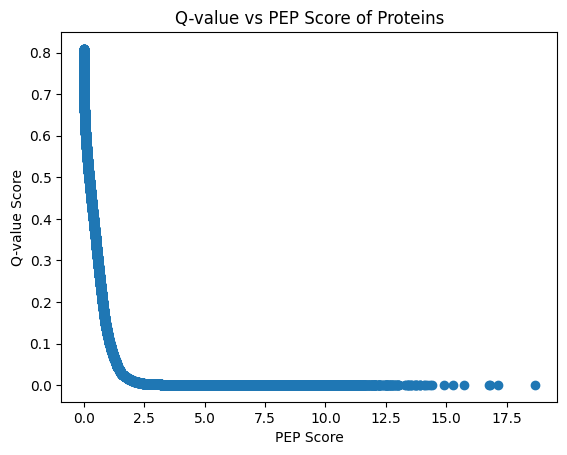

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapwithScore.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Score"], data["Q-value"])
plt.title('Q-value vs PEP Score of Proteins')
plt.xlabel("PEP Score")
plt.ylabel("Q-value Score")
plt.show()

In [7]:
df = pd.read_csv('MergedHumanProteome-PickedProteinGroupNoRemapwithScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

print(df_filtered)
df_filtered.to_csv('MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilterwithScore.csv', index=False)

      Unnamed: 0   Q-value Protein Type Protein Uniprot  \
0              0  0.000316           sp          P35527   
1              1  0.000316           sp          P35908   
2              2  0.000316           sp          P67809   
3              3  0.000316           sp          P09972   
4              4  0.000316           sp          P14550   
...          ...       ...          ...             ...   
6229        6216  0.009721      REV__sp          Q9BSH3   
6230        6217  0.009721           sp          O43822   
6231        6218  0.009721           sp          Q03135   
6232        6219  0.009721           sp          Q4ADV7   
6233        6220  0.009880      REV__sp          Q9P2D7   

                                          Protein Label      Score  \
0                                            K1C9_HUMAN  18.661526   
1                                            K22E_HUMAN  17.132790   
2                     YBOX1_HUMAN;sp|Q9Y2T7|YBOX2_HUMAN  16.793147   
3          

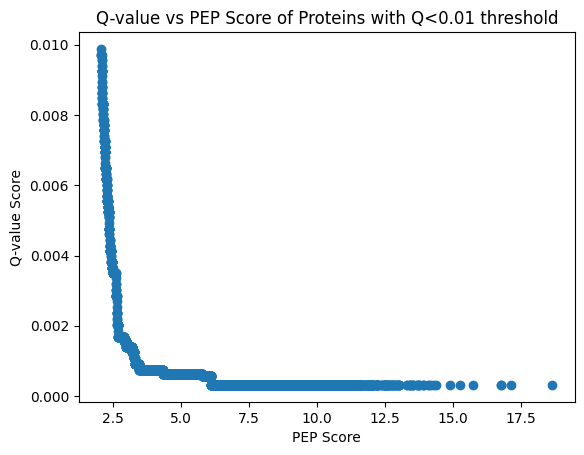

In [8]:
# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilterwithScore.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Score"], data["Q-value"])
plt.title('Q-value vs PEP Score of Proteins with Q<0.01 threshold')
plt.xlabel("PEP Score")
plt.ylabel("Q-value Score")
plt.show()

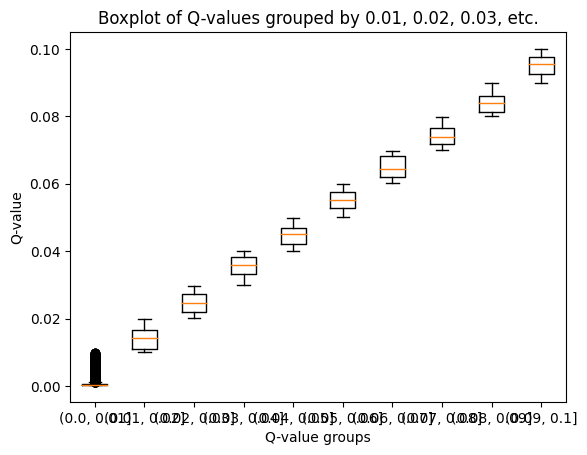

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapwithScore.csv")

# create bins based on the q-value column
bins = pd.cut(df['Q-value'], bins=[0.01*i for i in range(11)])

# group the q-values by the bins
groups = df.groupby(bins)['Q-value']

# create a boxplot of the q-values for each group
fig, ax = plt.subplots()
ax.boxplot([group[1] for group in groups], labels=[str(group[0]) for group in groups])
ax.set_xlabel('Q-value groups')
ax.set_ylabel('Q-value')
ax.set_title('Boxplot of Q-values grouped by 0.01, 0.02, 0.03, etc.')
plt.show()

In [10]:
import csv

# open the CSV file
with open('MergedHumanProteome-PickedProteinGroupNoRemapwithScore.csv', 'r') as file:
    reader = csv.reader(file)
    # skip header row
    next(reader)
    # initialize max_q to negative infinity
    max_q = float('-inf')
    # loop through each row in the file
    for row in reader:
        # extract the Q-value from the row
        q_value = float(row[1])
        # update max_q if necessary
        if q_value > max_q:
            max_q = q_value

print("The highest Q-value in the file is:", max_q)

The highest Q-value in the file is: 0.808951771


/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_33012/522466836.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()


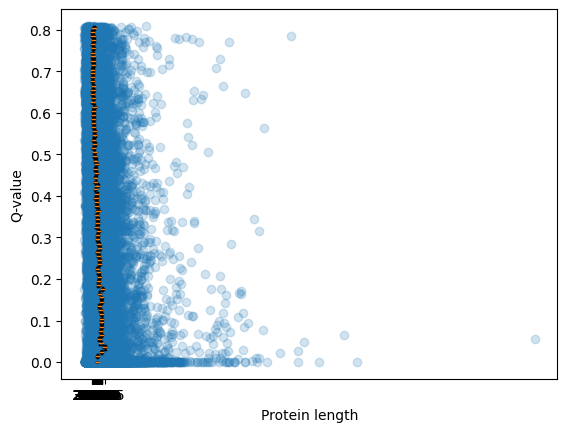

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapwithScore.csv")

# group q-values by 0.01 and calculate the median protein length for each group
df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()

# create a scatter plot with protein length on x-axis and q-value on y-axis
plt.scatter(df['Length'], df['Q-value'], alpha=0.2)

# add a boxplot for each group of q-values and the corresponding median protein length
plt.boxplot([df[df['Q-value'].between(q.left, q.right)]['Q-value'] for q in df_grouped.index],
            positions=df_grouped['Length'], widths=100, showfliers=False)

# set x-axis and y-axis labels
plt.xlabel('Protein length')
plt.ylabel('Q-value')

# show the plot
plt.show()

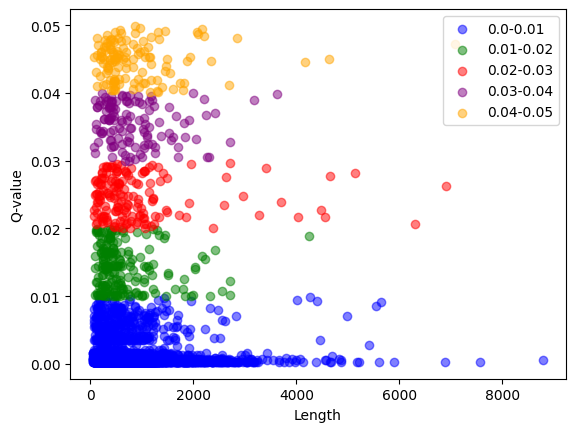

In [13]:
# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapwithScore.csv")

# group proteins by Q-value
qvalue_groups = df.groupby(pd.cut(df['Q-value'], bins=[0, 0.01, 0.02, 0.03, 0.04, 0.05]))

# plot a scatter plot of protein length vs Q-value for each group
fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, (group_name, group_df) in enumerate(qvalue_groups):
    ax.scatter(group_df['Length'], group_df['Q-value'], color=colors[i], alpha=0.5, label=f'{group_name.left}-{group_name.right}')
    
# add a legend, x-axis label, and y-axis label
ax.legend()
ax.set_xlabel('Length')
ax.set_ylabel('Q-value')

# show the plot
plt.show()

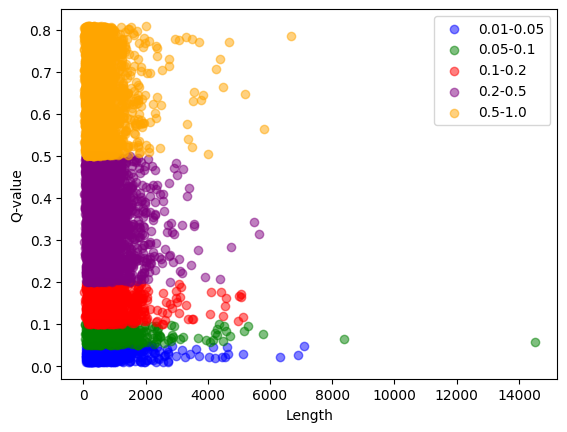

In [14]:
# read csv file into a dataframe

# group proteins by Q-value
qvalue_groups = df.groupby(pd.cut(df['Q-value'], bins=[0.01, 0.05, 0.10, 0.20, 0.50, 1.00]))

# plot a scatter plot of protein length vs Q-value for each group
fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, (group_name, group_df) in enumerate(qvalue_groups):
    ax.scatter(group_df['Length'], group_df['Q-value'], color=colors[i], alpha=0.5, label=f'{group_name.left}-{group_name.right}')
    
# add a legend, x-axis label, and y-axis label
ax.legend()
ax.set_xlabel('Length')
ax.set_ylabel('Q-value')

# show the plot
plt.show()

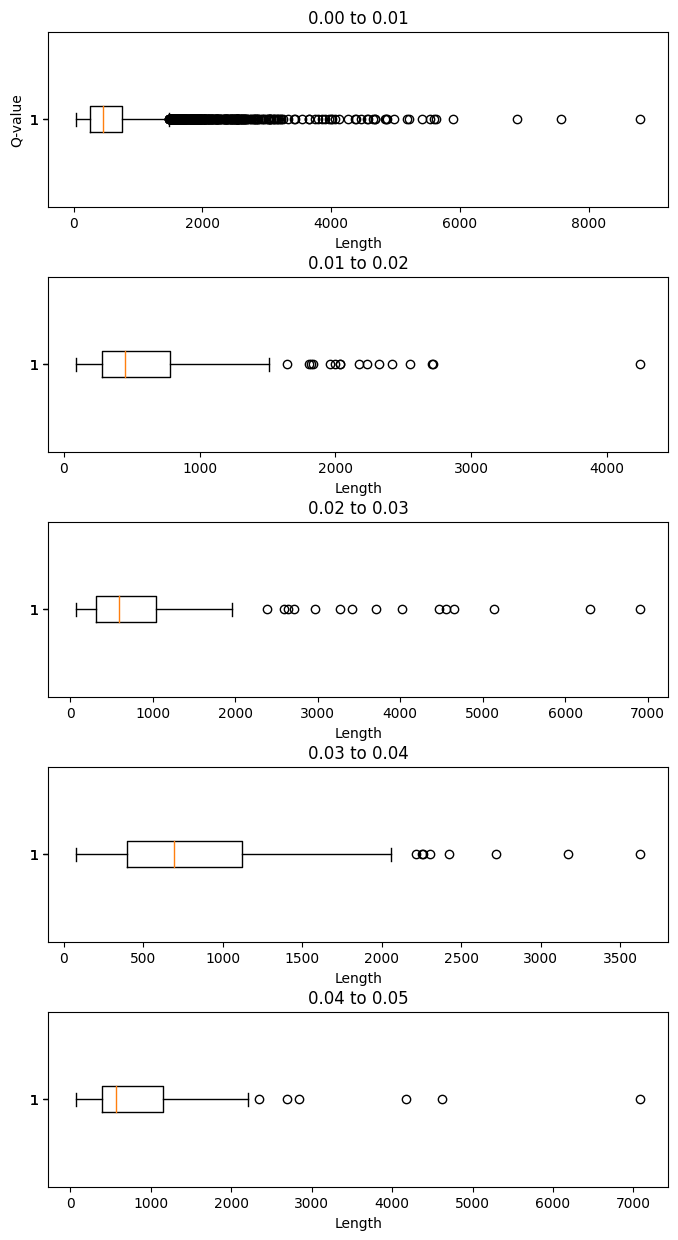

In [15]:
# read csv file into a dataframe
# group proteins by Q-value
qvalue_groups = data.groupby(pd.cut(data['Q-value'], bins=[0, 0.01, 0.02, 0.03, 0.04, 0.05]))

# create 5 separate boxplot graphs to compare the length of protein and q-value groups
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15), sharey=True)

# loop over each group and create a boxplot
for i, (group_name, group_df) in enumerate(qvalue_groups):
    ax = axes[i]
    ax.boxplot(group_df['Length'], vert=False)
    ax.set_title(f"{group_name.left:.2f} to {group_name.right:.2f}")
    ax.set_xlabel('Length')
    if i == 0:
        ax.set_ylabel('Q-value')

# adjust spacing and show the plot
plt.subplots_adjust(hspace=0.4)
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_33012/3684108064.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()


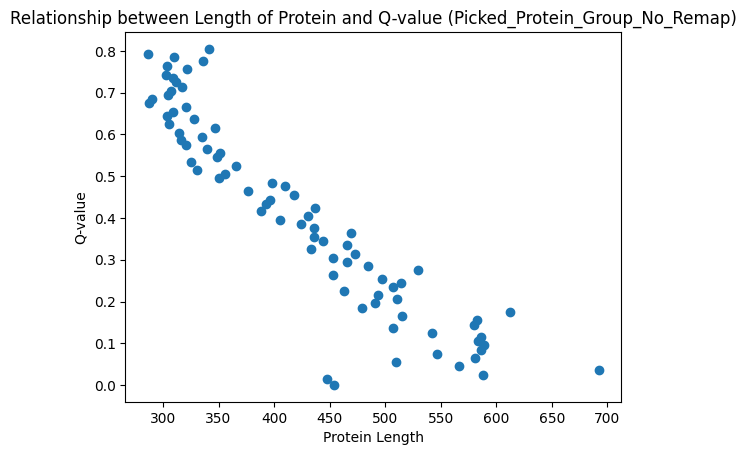

In [16]:
import numpy as np

# read csv file into a dataframe
# group proteins by q-values and calculate median protein length for each group
df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()

# plot the median protein length vs q-value
plt.scatter(df_grouped['Mass'], df_grouped['Q-value'])

# set axis labels
plt.xlabel('Protein Length')
plt.ylabel('Q-value')
plt.title('Relationship between Length of Protein and Q-value (Picked_Protein_Group_No_Remap)')
# show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_79173/2523286774.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()


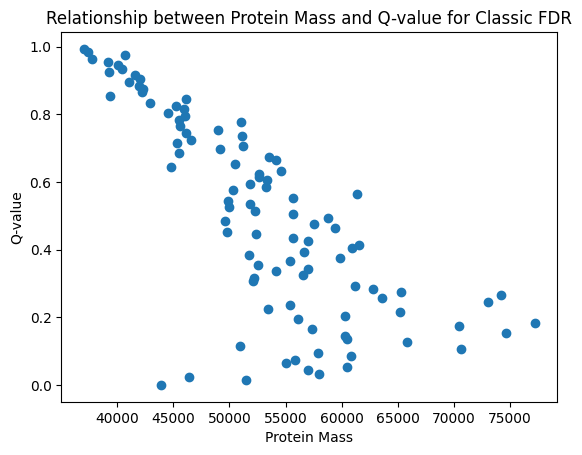

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file into a dataframe
df = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv")

# group proteins by q-values and calculate median protein length for each group
df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()

# plot the median protein length vs q-value
plt.scatter(df_grouped['Mass'], df_grouped['Q-value'])

# set axis labels
plt.xlabel('Protein Mass (Da)')
plt.ylabel('Q-value')
plt.title('Relationship between Protein Mass and Q-value for Classic FDR')
# show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_33012/3132285045.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_filtered, x='Mass', y='Q-value', cmap='Blues', shade=True, thresh=0.05)


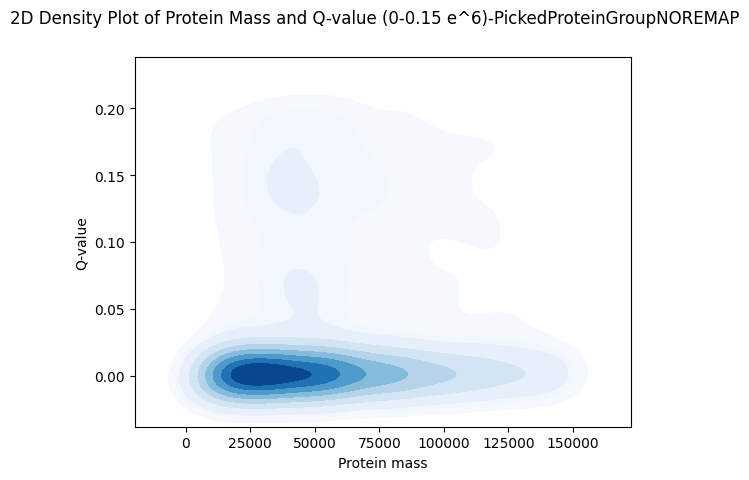

In [24]:
# Filter data for mass values between 0 and 0.3 e^6
data_filtered = data[(data['Mass'] >= 0) & (data['Mass'] <= 0.15e6) & (data['Q-value'] >= 0.0) & (data['Q-value'] <= 0.2)]
# Create a 2D density plot of protein mass and Q-value for filtered data
sns.kdeplot(data=data_filtered, x='Mass', y='Q-value', cmap='Blues', shade=True, thresh=0.05)

# Set axis labels and title
plt.xlabel('Protein mass')
plt.ylabel('Q-value')
plt.suptitle('2D Density Plot of Protein Mass and Q-value (0-0.15 e^6)-PickedProteinGroupNOREMAP', fontsize=12)

# Show the plot
plt.show()

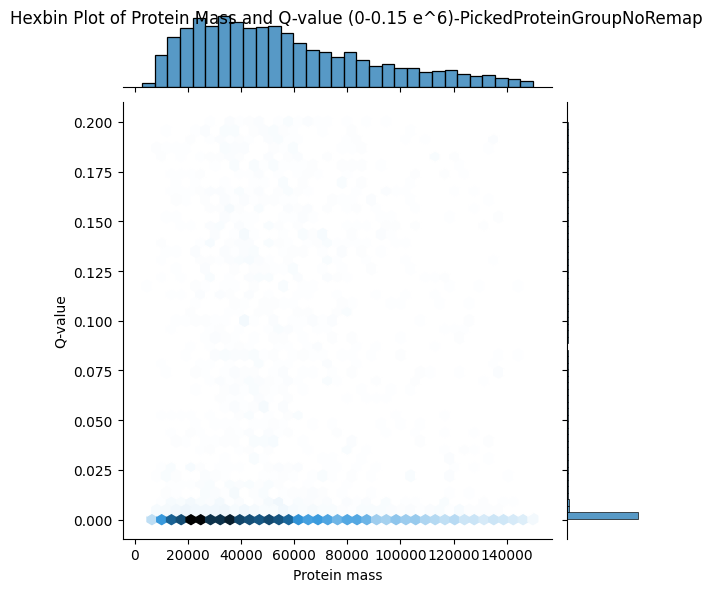

In [26]:
# Filter data for mass values between 0 and 0.3 e^6
data_filtered = data[(data['Mass'] >= 0) & (data['Mass'] <= 0.15e6) & (data['Q-value'] >= 0.0) & (data['Q-value'] <= 0.2)]

# Create a hexbin plot of protein mass and Q-value for filtered data
sns.jointplot(data=data_filtered, x='Mass', y='Q-value', kind='hex')

# Set axis labels and title
plt.xlabel('Protein mass')
plt.ylabel('Q-value')
plt.suptitle('Hexbin Plot of Protein Mass and Q-value (0-0.15 e^6)-PickedProteinGroupNoRemap', fontsize=12)

# Show the plot
plt.show()

# np.polyfit. polynomial to your data. 

# Boxplot so divide the proteins into 5-10 groups of Q-values and show by boxplot the length distribution 

<Figure size 1000x600 with 0 Axes>

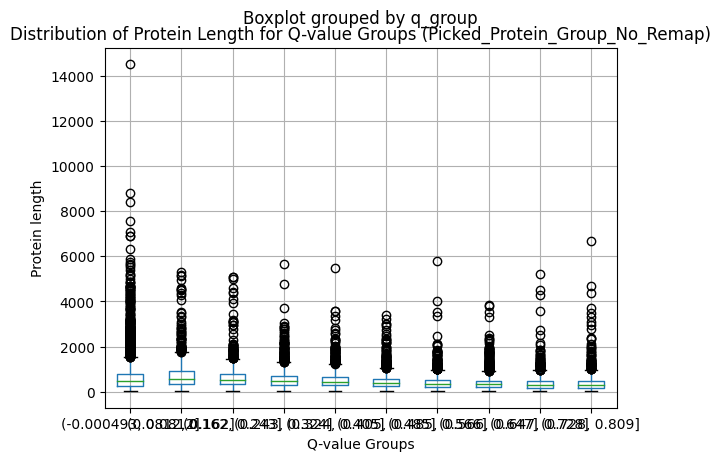

In [17]:

# create 10 groups of proteins based on Q-values
data['q_group'] = pd.cut(data['Q-value'], bins=10)


plt.figure(figsize=(10, 6))
# create a boxplot of protein length for each Q-value group
data.boxplot(column='Length', by='q_group')

# set axis labels and title
plt.xlabel('Q-value Groups')
plt.ylabel('Protein length')
plt.title('Distribution of Protein Length for Q-value Groups (Picked_Protein_Group_No_Remap)')
#plt.xlim(left=-1, right=10)
#plt.ylim(left=-2, right=15)

# show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_33012/1622528796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['q_group'] = pd.cut(data_filtered['Q-value'], bins=10)


<Figure size 1000x600 with 0 Axes>

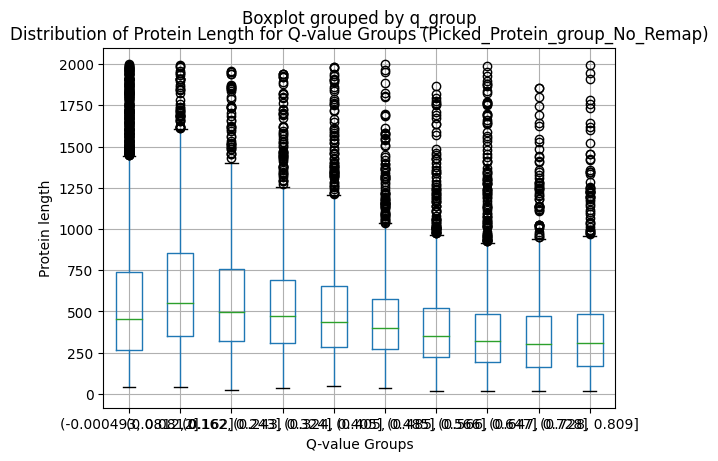

In [27]:
# Filter data for protein length values between 0 and 2000
data_filtered = data[(data['Length'] >= 0) & (data['Length'] <= 2000)]

# create 10 groups of proteins based on Q-values
data_filtered['q_group'] = pd.cut(data_filtered['Q-value'], bins=10)

plt.figure(figsize=(10, 6))
# create a boxplot of protein length for each Q-value group
data_filtered.boxplot(column='Length', by='q_group')

# set axis labels and title
plt.xlabel('Q-value Groups')
plt.ylabel('Protein length')
plt.title('Distribution of Protein Length for Q-value Groups (Picked_Protein_group_No_Remap)')

# show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_33012/2116153776.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()


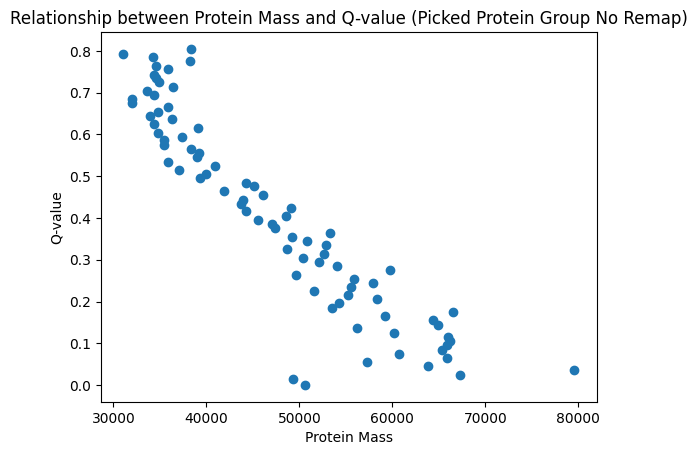

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapwithScore.csv")

# group proteins by q-values and calculate median protein length for each group
df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()

# plot the median protein length vs q-value
plt.scatter(df_grouped['Mass'], df_grouped['Q-value'])

# set axis labels
plt.xlabel('Protein Mass')
plt.ylabel('Q-value')
plt.title('Relationship between Protein Mass and Q-value (Picked Protein Group No Remap)')
# show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_33012/622731075.py:7: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=data, x='Mass', y='Q-value', shade=True, cmap='Blues', shade_lowest=False)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_33012/622731075.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='Mass', y='Q-value', shade=True, cmap='Blues', shade_lowest=False)


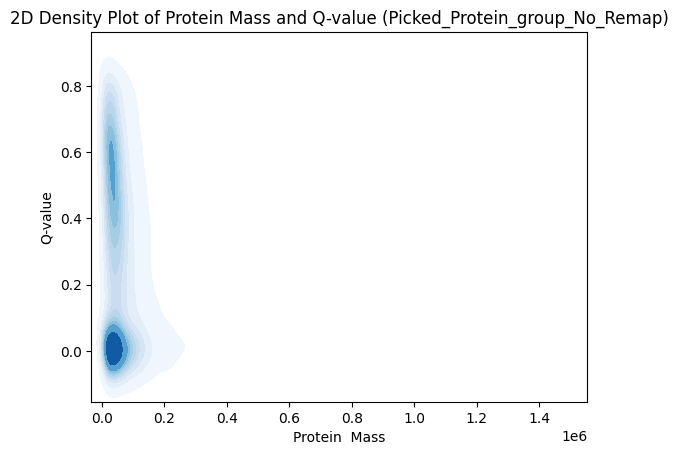

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
# Create a 2D density plot of protein mass and Q-value
sns.kdeplot(data=data, x='Mass', y='Q-value', shade=True, cmap='Blues', shade_lowest=False)

# Set axis labels and title
plt.xlabel('Protein  Mass')
plt.ylabel('Q-value')
plt.title('2D Density Plot of Protein Mass and Q-value (Picked_Protein_group_No_Remap)')

# Show the plot
plt.show()

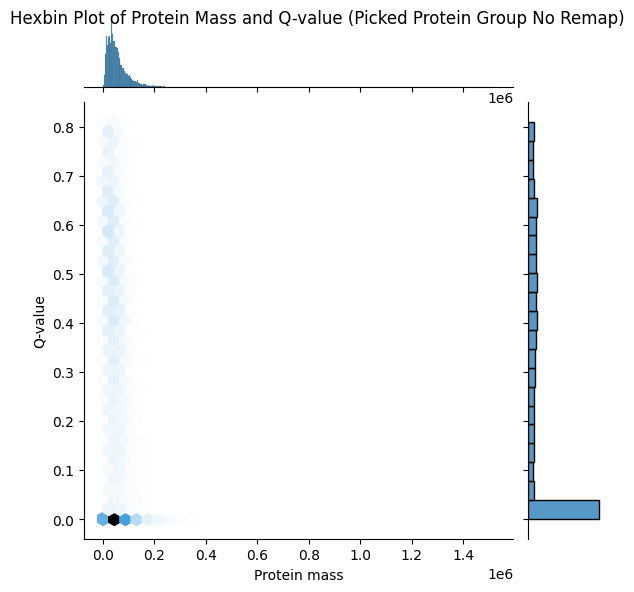

In [20]:
# Create a hexbin plot of protein mass and Q-value
sns.jointplot(data=data, x='Mass', y='Q-value', kind='hex')

# Set axis labels and title
plt.xlabel('Protein mass')
plt.ylabel('Q-value')
plt.suptitle('Hexbin Plot of Protein Mass and Q-value (Picked Protein Group No Remap)', fontsize=12)

# Show the plot
plt.show()

In [ ]:
Hex